# Evaluate QMDP Policy in High Fidelity Environment

In [1]:
using AutoViz, Reel, POMDPs, StatsBase, POMDPToolbox, SARSOP, QMDP, AutomotiveDrivingModels, JLD, Parameters, Distributions

INFO: Recompiling stale cache file /mnt/c/Users/Maxime/wsl/.julia/lib/v0.6/LightXML.ji for module LightXML.


In [2]:
include("../../admenv/crosswalk/occluded_crosswalk_env.jl")
include("../../admenv/crosswalk/pomdp_types.jl")
include("../../admenv/crosswalk/spaces.jl")
include("../../admenv/crosswalk/transition.jl")
include("../../admenv/crosswalk/observation.jl")
include("../../admenv/crosswalk/belief.jl")
include("../../admenv/crosswalk/adm_helpers.jl")
include("../../admenv/crosswalk/decomposition.jl")
include("../../admenv/crosswalk/render_helpers.jl")

LoadError: [91mcould not open file /mnt/c/Users/Maxime/OneDrive - Leland Stanford Junior University/Research/maximeworkspace/admenv/crosswalk/occluded_crosswalk_env.jl[39m

In [189]:
include("config.jl")
include("ego_control.jl")
include("sensor.jl")
include("policy.jl")
include("state_estimation.jl")
include("constant_pedestrian.jl")
include("simulation.jl")
include("baseline_policy.jl")
include("render_helpers.jl")

## Initialization

In [4]:
config = EvalConfig(time_out = 300, n_episodes = 500)

EvalConfig 
	 Sim step (s) 0.10 
	 N episodes  500 
	 Time out  300 
	 Time out  300 


In [5]:
cam = StaticCamera(VecE2(25, 0.), 20.)

AutoViz.StaticCamera(VecE2(25.000, 0.000), 20.0)

In [151]:
params = EnvParams(ped_rate = 0.05)
env = CrosswalkEnv(params);

In [152]:
pomdp = OCPOMDP();
# pomdp.p_birth = 0.3
pomdp.collision_cost = -1.6

-1.6

In [153]:
states(pomdp);

In [154]:
get_X_grid(pomdp)

5.0:1.0:37.0

In [155]:
solver = QMDPSolver(max_iterations=100, tolerance=0.001)
qmdp_policy = solve(solver, pomdp, verbose=true)

Iteration : 1, residual: 1.5999999999999996, iteration run-time: 0.786008183, total run-time: 0.786008183
Iteration : 2, residual: 1.5199999999999998, iteration run-time: 0.773399003, total run-time: 1.559407186
Iteration : 3, residual: 1.444, iteration run-time: 0.777908236, total run-time: 2.337315422
Iteration : 4, residual: 0.8573750000000002, iteration run-time: 0.757331454, total run-time: 3.094646876
Iteration : 5, residual: 0.8113245849609375, iteration run-time: 0.755009282, total run-time: 3.849656158
Iteration : 6, residual: 0.761690610351562, iteration run-time: 0.770925522, total run-time: 4.62058168
Iteration : 7, residual: 0.7074541584091182, iteration run-time: 0.798522944, total run-time: 5.419104624
Iteration : 8, residual: 0.6490649624582283, iteration run-time: 0.7871428, total run-time: 6.206247424
Iteration : 9, residual: 0.5263692864409736, iteration run-time: 0.767906067, total run-time: 6.974153491
Iteration : 10, residual: 0.46003796799036695, iteration run-ti

QMDP.QMDPPolicy{OCPOMDP,OCAction}([0.445243 0.445243 0.445243 0.448462; 0.478158 0.478158 0.478158 0.479292; … ; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], OCAction[OCAction(-4.0), OCAction(-2.0), OCAction(0.0), OCAction(2.0)], OCPOMDP(CrosswalkEnv(Roadway, AutomotiveDrivingModels.Lane(LaneTag(2, 1), AutomotiveDrivingModels.CurvePt[CurvePt({25.000, -10.000, 1.571}, 0.000, 0.000, NaN), CurvePt({25.000, 10.000, 1.571}, 20.000, 0.000, NaN)], 6.0, AutomotiveDrivingModels.SpeedLimit(-Inf, Inf), AutomotiveDrivingModels.LaneBoundary(:unknown, :unknown), AutomotiveDrivingModels.LaneBoundary(:unknown, :unknown), AutomotiveDrivingModels.LaneConnection[], AutomotiveDrivingModels.LaneConnection[]), AutomotiveDrivingModels.ConvexPolygon[ConvexPolygon: len 4 (max 4 pts)
	VecE2(15.000, -1.500)
	VecE2(15.000, -4.500)
	VecE2(21.500, -4.500)
	VecE2(21.500, -1.500)
], EnvParams(2, 50.0, 3.0, 20.0, 6.0, 5.0, 37.0, 8.0, 0.5, 2.0, 10.0)), VehicleDef(CAR, 4.000, 1.800), VehicleDef(PEDESTRIAN, 1.000, 1.000), 2.0, 1.0

In [156]:
JLD.save("crosswalk_policy.jld", "qmdp_policy", qmdp_policy)

In [157]:
qmdp_policy = load("crosswalk_policy.jld")
qmdp_policy = qmdp_policy["qmdp_policy"]

QMDP.QMDPPolicy{OCPOMDP,OCAction}([0.445243 0.445243 0.445243 0.448462; 0.478158 0.478158 0.478158 0.479292; … ; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], OCAction[OCAction(-4.0), OCAction(-2.0), OCAction(0.0), OCAction(2.0)], OCPOMDP(CrosswalkEnv(Roadway, AutomotiveDrivingModels.Lane(LaneTag(2, 1), AutomotiveDrivingModels.CurvePt[CurvePt({25.000, -10.000, 1.571}, 0.000, 0.000, NaN), CurvePt({25.000, 10.000, 1.571}, 20.000, 0.000, NaN)], 6.0, AutomotiveDrivingModels.SpeedLimit(-Inf, Inf), AutomotiveDrivingModels.LaneBoundary(:unknown, :unknown), AutomotiveDrivingModels.LaneBoundary(:unknown, :unknown), AutomotiveDrivingModels.LaneConnection[], AutomotiveDrivingModels.LaneConnection[]), AutomotiveDrivingModels.ConvexPolygon[ConvexPolygon: len 4 (max 4 pts)
	VecE2(15.000, -1.500)
	VecE2(15.000, -4.500)
	VecE2(21.500, -4.500)
	VecE2(21.500, -1.500)
], EnvParams(2, 50.0, 3.0, 20.0, 6.0, 5.0, 37.0, 8.0, 0.5, 2.0, 10.0)), VehicleDef(CAR, 4.000, 1.800), VehicleDef(PEDESTRIAN, 1.000, 1.000), 2.0, 1.0

In [158]:
sarsop_policy = load_policy(pomdp, "crosswalk30.0.policy")

LoadError: [91mPolicy file crosswalk30.0.policy does not exist[39m

In [159]:
sensor = POMDPSensor(pomdp = pomdp, sensor = SimpleSensor(0.5, 0.5))

POMDPSensor
  pomdp: OCPOMDP
  sensor: SimpleSensor


In [160]:
policy = QMDPEval(env, pomdp, qmdp_policy);

In [161]:
up = MixedUpdater(pomdp, config.sim_dt);

In [162]:
a0 = -4.
ego0 = initial_ego(env, config.rng)
b0 = Dict{Int64, OCDistribution}()
b0[-1] = initial_state_distribution(policy.pomdp, ego0.state)
o0 = Dict{Int64, OCObs}()

Dict{Int64,OCState} with 0 entries

In [163]:
update_freq = 5
ego_model = CrosswalkDriver(update_freq, 0, env, a0, b0, o0, ego0, sensor, policy, up);

In [164]:
reset_model!(ego_model, ego0)

0.0

In [165]:
overlay = QMDPOverlay(ego_model);

## Simulation

In [178]:
ego0 = initial_ego(env, config.rng)
reset_model!(ego_model, ego0)
models = Dict{Int, DriverModel}()
models[1] = ego_model
scene = initial_scene(models, env, config)
push!(scene, ego0)
nticks = 200
rec = SceneRecord(nticks+1, config.sim_dt)

SceneRecord(nscenes=0)

In [179]:
# execute the simulation
@time simulate!(rec, scene, env, models, nticks, config.rng, config.n_ped, config.callbacks)

 27.192914 seconds (228.59 M allocations: 20.027 GiB, 20.41% gc time)


SceneRecord(nscenes=201)

In [190]:
reset_overlay!(overlay, ego0)
duration, fps, render_rec = animate_record(rec, overlay, 24)
speed_factor = 1
film = roll(render_rec, fps = fps*speed_factor, duration = duration/speed_factor)

Reel.Frames{MIME{Symbol("image/png")}}("C:\\Users\\Maxime\\AppData\\Local\\Temp\\jl_C3A.tmp", 0x00000000000000c9, 10.0, nothing)

In [186]:
rec

SceneRecord(nscenes=201)

In [187]:
JLD.save("rec.jld", "rec", rec)

HDF5-DIAG: Error detected in HDF5 (1.8.13) thread 0:
  #000: /home/abuild/rpmbuild/BUILD/hdf5-1.8.13/src/H5Tfields.c line 87 in H5Tget_nmembers(): not a datatype
    major: Invalid arguments to routine
    minor: Inappropriate type
HDF5-DIAG: Error detected in HDF5 (1.8.13) thread 0:
  #000: /home/abuild/rpmbuild/BUILD/hdf5-1.8.13/src/H5Tfields.c line 87 in H5Tget_nmembers(): not a datatype
    major: Invalid arguments to routine
    minor: Inappropriate type


LoadError: [91mError getting the number of members[39m

## Evaluation

In [ ]:
crash = 0
avg_step = 0
success = 0
time_out = 0
avg_step = 0
for i=1:config.n_episodes    
    ego0 = initial_ego(env, config.rng)
    reset_model!(ego_model, ego0)
    models = Dict{Int, DriverModel}()
    models[1] = ego_model
    scene = initial_scene(models, env, config)
    push!(scene, ego0)
    nticks = 200
    rec = SceneRecord(nticks+1, config.sim_dt)
    # execute the simulation
    simulate!(rec, scene, env, models, nticks, config.rng, config.n_ped, config.callbacks)
    avg_step += nframes(rec)
    
    # analyse output 
    if is_crash(rec[0])
        crash += 1
        println("Episode $i CRASH")
        break
    elseif is_terminal(rec[0], env)
        success += 1
        println("Episode $i SUCCESS")
    elseif nframes(rec) >= config.time_out
        time_out += 1
        println("Episode $i TIME OUT")
#         break
    else
        println("Episode $i nothing happened, frames: $(nframes(rec))")
    end
end
println("End of the simulation: Crashes $crash , Successes $success, Time out $time_out, Avg Step $(avg_step/config.n_episodes)")

Starting with 0 pedestrians on the scene
Episode 1 SUCCESS
Starting with 1 pedestrians on the scene
Episode 2 SUCCESS
Starting with 0 pedestrians on the scene
Episode 3 SUCCESS
Starting with 4 pedestrians on the scene
Episode 4 SUCCESS
Starting with 1 pedestrians on the scene
Episode 5 SUCCESS
Starting with 2 pedestrians on the scene
Episode 6 SUCCESS
Starting with 6 pedestrians on the scene
Episode 7 SUCCESS
Starting with 3 pedestrians on the scene
Episode 8 SUCCESS
Starting with 1 pedestrians on the scene
Episode 9 SUCCESS
Starting with 2 pedestrians on the scene
Episode 10 SUCCESS
Starting with 0 pedestrians on the scene
Episode 11 SUCCESS
Starting with 0 pedestrians on the scene
Episode 12 SUCCESS
Starting with 0 pedestrians on the scene
Episode 13 SUCCESS
Starting with 0 pedestrians on the scene
Episode 14 SUCCESS
Starting with 3 pedestrians on the scene
Episode 15 SUCCESS
Starting with 2 pedestrians on the scene
Episode 16 SUCCESS
Starting with 0 pedestrians on the scene
Episode 

Episode 137 SUCCESS
Starting with 2 pedestrians on the scene
Episode 138 SUCCESS
Starting with 1 pedestrians on the scene
Episode 139 SUCCESS
Starting with 2 pedestrians on the scene
Episode 140 SUCCESS
Starting with 1 pedestrians on the scene
Episode 141 SUCCESS
Starting with 2 pedestrians on the scene
Episode 142 TIME OUT
Starting with 1 pedestrians on the scene
Episode 143 SUCCESS
Starting with 2 pedestrians on the scene
Episode 144 SUCCESS
Starting with 1 pedestrians on the scene
Episode 145 SUCCESS
Starting with 6 pedestrians on the scene
Episode 146 SUCCESS
Starting with 0 pedestrians on the scene
Episode 147 SUCCESS
Starting with 1 pedestrians on the scene
Episode 148 SUCCESS
Starting with 3 pedestrians on the scene
Episode 149 SUCCESS
Starting with 1 pedestrians on the scene
Episode 150 SUCCESS
Starting with 3 pedestrians on the scene
Episode 151 SUCCESS
Starting with 0 pedestrians on the scene
Episode 152 SUCCESS
Starting with 1 pedestrians on the scene
Episode 153 SUCCESS
Sta

In [ ]:
#qmdp -10 not inflated ; crashes 3 successes 472 time out 25 avg step 132.316
#qmdp -50 not inflate ; crashes 0  successes 468 time out 32 avg step 135.312
#qmdp -100 not inflated ; crashes 0 successes 480 time out 20 avg step 135.012
#qmdp -1000 not inflated; crashes 0 successes 477 time out 23 avg step 137.908

In [ ]:
#sarsop -100 not inflated ; 

## Policy Plot

In [9]:
using PGFPlots, GridInterpolations, Colors, ColorBrewer

In [10]:
include("policy_plot.jl")

policy_plot (generic function with 1 method)

In [31]:
g = GroupPlot(2, 6, groupStyle = "horizontal sep = 4cm, vertical sep = 4cm")
for cost in [1.0 5.0 10.0 15.0 20.0 30.0 50.0 70.0]
    sarsop_policy = load_policy(pomdp, "crosswalk$cost.policy")
    ax = policy_plot(pomdp, sarsop_policy, n_bins = 10, n_pts = 20, v_ego=5., sig=0.01)
    push!(g, ax)
end

INFO: Precompiling module ImageMagick.


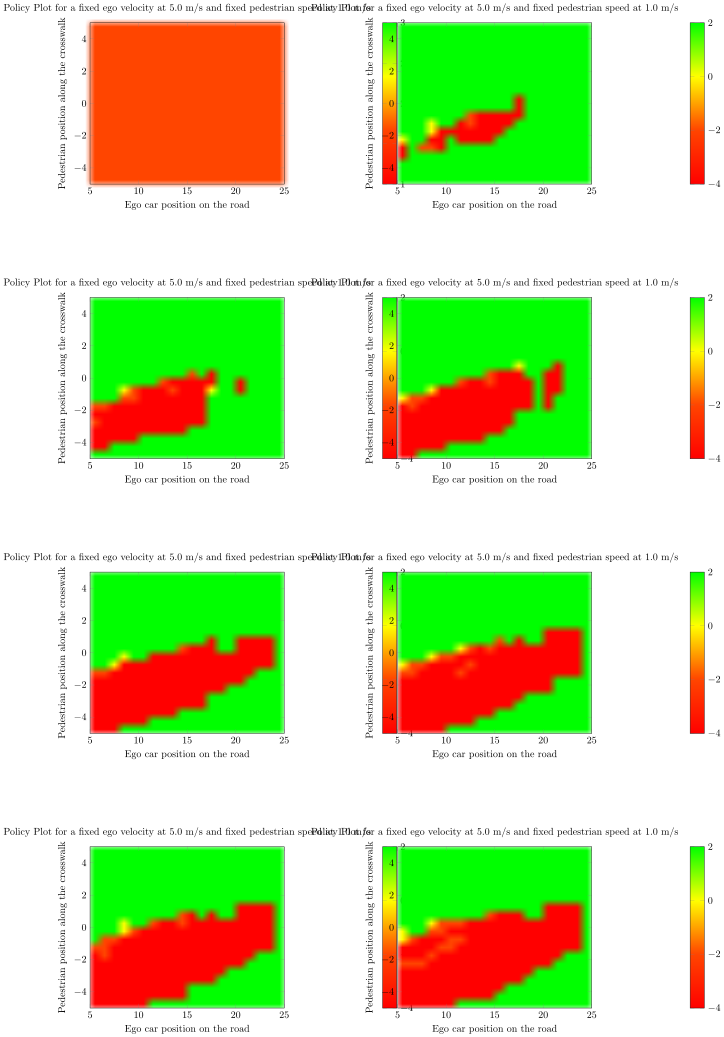

In [32]:
g

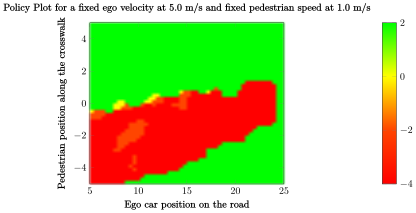

In [51]:
policy_plot(pomdp, sarsop_policy, n_bins = 10, n_pts = 50, v_ego=5., sig=0.01)

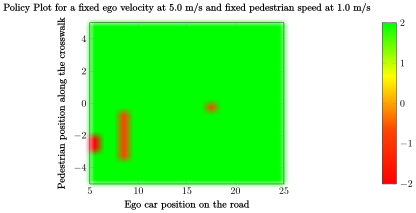

In [78]:
policy_plot(pomdp, sarsop_policy, n_bins = 10, n_pts = 20, v_ego=5., sig=1.)

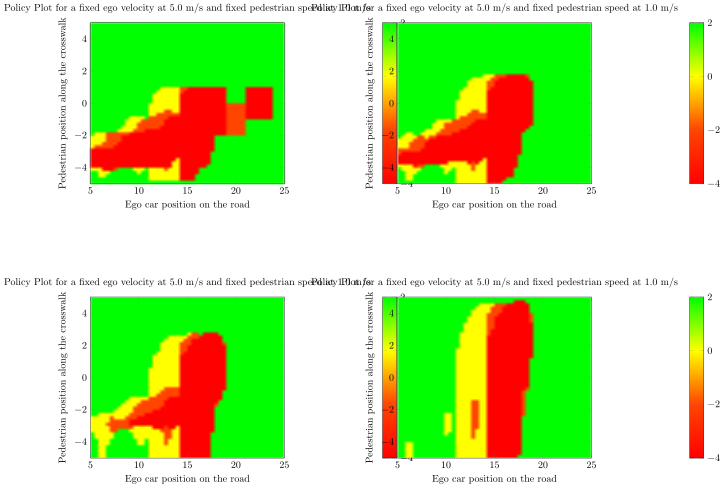

In [38]:
g = GroupPlot(2, 2, groupStyle = "horizontal sep = 4cm, vertical sep = 4cm")
for sig in [0.001, 0.5, 1, 2]
    p = policy_plot(pomdp, qmdp_policy, n_bins = 10, n_pts = 50, v_ego=5., sig=sig)
    push!(g, p)
end
g

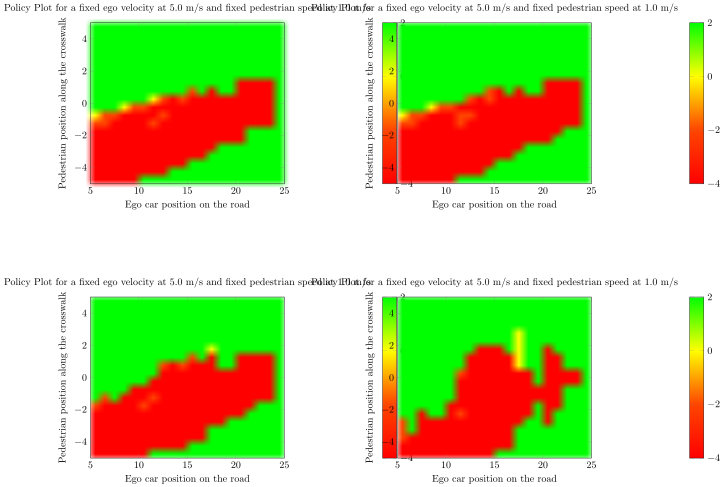

In [41]:
g = GroupPlot(2, 2, groupStyle = "horizontal sep = 4cm, vertical sep = 4cm")
for sig in [0.001, 0.5, 1, 2]
    p = policy_plot(pomdp, sarsop_policy, n_bins = 10, n_pts = 20, v_ego=5., sig=sig)
    push!(g, p)
end
g